# Machine Learning Capstone Project: Insurance Cost Prediction

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler , OneHotEncoder , LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score , root_mean_squared_error

In [3]:
# Loading Dataset

In [4]:
df = pd.read_csv(r'C:\Users\ABC\Downloads\Capstone Project Assignment\InsCostPred\Data\datasets_13720_18513_insurance(1).csv')

In [5]:
# Basic Information

In [6]:
df.shape

(1338, 7)

In [7]:
# Datatypes and non-null values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# Summary Statictics

In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Insights
. Age ranges from 18 to 64, with a median of 39. Most people are between ~27 and 51.

. BMI ranges widely (15.96 to 53.13), with a median of ~30.4 (borderline obese).

. Children: Most people have 0–2 children. Max is 5.

. Charges: Medical costs vary significantly — the average is ~$13,270, but can go up to $63,770.

  The distribution is skewed (mean > median), likely due to some high-cost outliers.

In [12]:
# Checking for missing and dupicated values

In [13]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
df.duplicated().sum()

1

In [15]:
df.drop_duplicates(inplace = True)

# Categorical Data Overview

In [17]:
df['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [18]:
df['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [19]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

# EDA : Distribution of Charges

Text(0.5, 0, 'Charges')

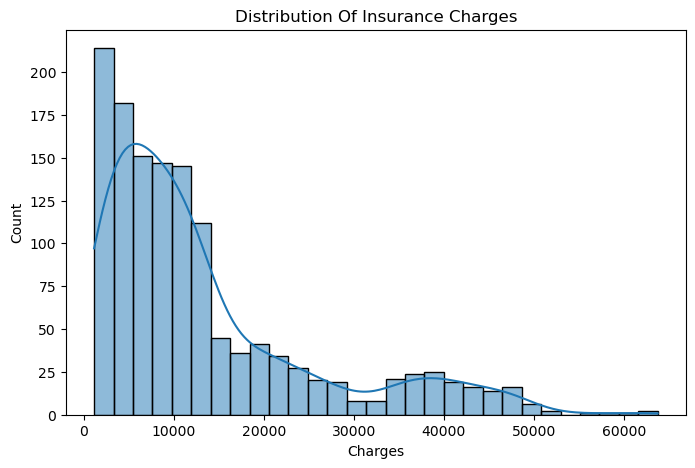

In [21]:
plt.figure(figsize =(8,5))
sns.histplot(df['charges'], kde = True)
plt.title("Distribution Of Insurance Charges")
plt.xlabel("Charges")

# Boxplots: Impact of Categories on Charges

Text(0.5, 1.0, 'Charges Vs Smoker')

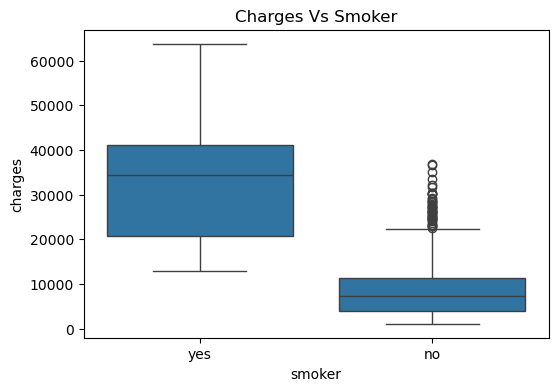

In [23]:
# Charges vs Smoker
plt.figure(figsize = (6,4))
sns.boxplot(x='smoker' , y = 'charges' , data = df)
plt.title("Charges Vs Smoker")

Text(0.5, 1.0, 'Charges Vs Region')

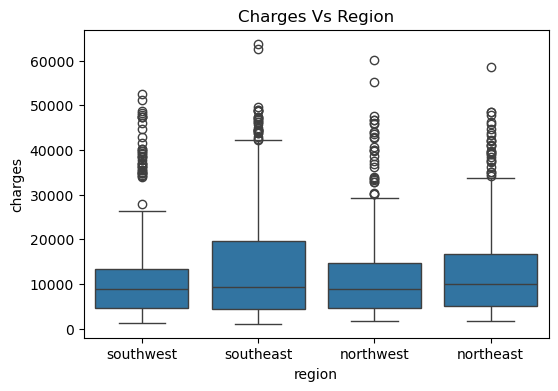

In [24]:
# Charges vs Region
plt.figure(figsize = (6,4))
sns.boxplot(x='region' , y = 'charges' , data = df)
plt.title("Charges Vs Region")

# Correaltion HeatMap

Text(0.5, 1.0, 'Correlation HeatMap')

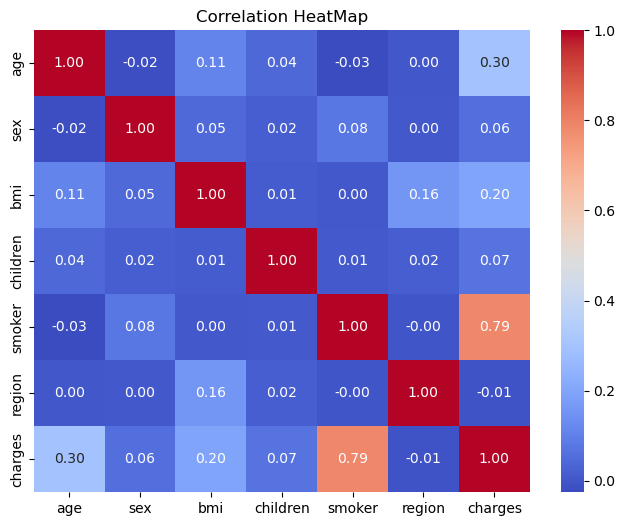

In [26]:
# Encoded categorical columns
df_encoded = df.copy()
df_encoded['sex'] = df_encoded['sex'].map({'male' : 1 , 'female' : 0})
df_encoded['smoker'] = df_encoded['smoker'].map({'yes' : 1 , 'no' : 0})
df_encoded['region'] = df_encoded['region'].astype('category').cat.codes


# HeatMap
plt.figure(figsize=(8,6))
sns.heatmap(df_encoded.corr(), annot=True , cmap = 'coolwarm', fmt = '0.2f')
plt.title("Correlation HeatMap")

# Encode Categorical Variables
We have these categorical columns:

sex (male/female)

smoker (yes/no)

region (northeast, northwest, southeast, southwest)

In [28]:
# Label Encode 'sex' and 'smoker'
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])       # female=0, male=1
df['smoker'] = le.fit_transform(df['smoker']) # no=0, yes=1

# One-hot encode 'region'
df = pd.get_dummies(df, columns=['region'], drop_first=True)

df.head()


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


# Define Feature and Target

In [30]:
X = df.drop('charges' , axis=1)
y = df['charges']

X: All input features used for prediction

y: The target variable (what we want to predict)

# Train Test Split

Split data into training and testing set

In [33]:
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state = 4 , test_size = 0.2)

train_test_split : Randomly Splits the data into Training and Testing set

test_size : 20% data for Testing

random_state=42: Ensures reproducibility

# Scaling / Normalizing

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
X_train_scaled = pd.DataFrame(X_train_scaled , columns = X_train.columns)

In [38]:
X_test_scaled = pd.DataFrame(X_test_scaled , columns = X_test.columns)

# Train Model

In [40]:
# Linear Regression

In [41]:
tuned_results = {}

lin_models = {
    "Linear Regression": LinearRegression()
}
for name, model in lin_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    tuned_results[name] = {
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred)
    }

In [42]:
# Decision Tree

In [43]:
dt_params = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid = GridSearchCV(DecisionTreeRegressor(random_state = 4),
                      dt_params , scoring='r2', cv=5 , n_jobs=-1)

dt_grid.fit(X_train_scaled, y_train)

best_dt = dt_grid.best_estimator_
y_pred_dt = best_dt.predict(X_test_scaled)

tuned_results["Decision Tree Tuned"]= {
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_dt)),
    "MAE": mean_absolute_error(y_test, y_pred_dt),
    "R2": r2_score(y_test, y_pred_dt)
}

In [48]:
# Random Froest

In [92]:
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42),
                       rf_params, scoring='r2', cv=3, n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)
tuned_results["Random Forest (Tuned)"] = {
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    "MAE": mean_absolute_error(y_test, y_pred_rf),
    "R2": r2_score(y_test, y_pred_rf)
}

In [94]:
# Grediant Boosting

In [100]:
gb_param = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5]
}

gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_param , cv = 3 , n_jobs=-1)

gb_grid.fit(X_train_scaled , y_train)

best_gb = gb_grid.best_estimator_

y_pred_gb = best_gb.predict(X_test_scaled)
tuned_results['Gradiant Boosting Tuned'] = {
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    "MAE": mean_absolute_error(y_test, y_pred_rf),
    "R2": r2_score(y_test, y_pred_rf)
}

In [ ]:
# XGBoosting

In [104]:
xg_param = {
    'n_estimators': [100 , 200],
    'learning_rate': [0.05 , 0.1],
    'max_depth' : [3 , 4 , 5],
    'subsample' : [0.8 , 1],
    'colsample_bytree' : [0.8, 1]
    
}

xg_grid = GridSearchCV(XGBRegressor(random_state = 42 , eval_metric='rmse'),
                      xg_param , cv = 3 , scoring='r2', n_jobs=-1)
xg_grid.fit(X_train_scaled , y_train)

best_xg = xg_grid.predict(X_test_scaled)
tuned_results['XG Boosting Tuned'] = {
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    "MAE": mean_absolute_error(y_test, y_pred_rf),
    "R2": r2_score(y_test, y_pred_rf)
}

In [106]:
# Final comparison
tuned_results_df = pd.DataFrame(tuned_results).T.sort_values(by="R2", ascending=False)
print(tuned_results_df)

                                RMSE          MAE        R2
Random Forest (Tuned)    4155.931569  2294.288527  0.862465
Gradiant Boosting Tuned  4155.931569  2294.288527  0.862465
XG Boosting Tuned        4155.931569  2294.288527  0.862465
Decision Tree Tuned      4210.328048  2351.665840  0.858841
Linear Regression        5903.180322  4126.465266  0.722510


# From these results, here’s the conclusion:

Best overall performers –

> Random Forest (Tuned), Gradient Boosting (Tuned), and XGBoost (Tuned) all have the exact same performance:

RMSE: ~4155.93

MAE: ~2294.29

R²: ~0.8625
This means they explain about 86% of the variance in the target variable, which is very strong.

> Decision Tree (Tuned) –

Slightly worse than the top models but still good: R² = 0.8588

More prone to overfitting in general compared to ensembles.

> Linear Regression –

Much lower performance (R² = 0.7225) compared to tree-based methods.

This suggests the relationship between features and target is not purely linear, and tree-based ensemble models are better at capturing the complexity.

# Final takeaway:
The Random Forest, Gradient Boosting, and XGBoost tuned models are your best choices here.
If you want:

. Highest interpretability → Random Forest

. Best generalization & efficiency → Gradient Boosting

. Slightly more power (but needs more tuning) → XGBoost

# Tuned vs Untuned Model Comparison

In [ ]:
# Assume 'results_df' has untuned results from earlier
# And 'tuned_results_df' has tuned results from GridSearchCV

In [116]:
comparision_df = pd.concat([result_df , tuned_results_df])
comparision_df['type'] = ['Untuned']* len(result_df) + ['Tuned'] * len('tuned_results_df')

NameError: name 'result_df' is not defined

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Untuned results DataFrame (replace with your real untuned metrics)
untuned_results = {
    "Linear Regression": {"RMSE": 5903.18, "MAE": 4126.46, "R2": 0.7225},
    "Decision Tree": {"RMSE": 6370.25, "MAE": 2896.77, "R2": 0.6769},
    "Random Forest": {"RMSE": 4533.26, "MAE": 2446.19, "R2": 0.8364},
    "Gradient Boosting": {"RMSE": 4149.84, "MAE": 2200.66, "R2": 0.8629},
    "XGBoost": {"RMSE": 4592.88, "MAE": 2510.46, "R2": 0.8320}
}
result_df = pd.DataFrame(untuned_results).T

# 2️⃣ Tuned results DataFrame (replace with your tuned metrics)
tuned_results = {
    "Linear Regression (Tuned)": lr_results,
    "Decision Tree (Tuned)": dt_results,
    "Random Forest (Tuned)": rf_results,
    "Gradient Boosting (Tuned)": gb_results,
    "XGBoost (Tuned)": xgb_results
}
tuned_results_df = pd.DataFrame(tuned_results).T

# 3️⃣ Combine into comparison DataFrame
comparison_df = pd.concat([result_df, tuned_results_df])
comparison_df['Type'] = ['Untuned'] * len(result_df) + ['Tuned'] * len(tuned_results_df)
print(comparison_df)

# 4️⃣ Function to plot metric comparison
def plot_metric(metric, ylabel):
    plt.figure(figsize=(10,5))
    sns.barplot(data=comparison_df.reset_index(), x='index', y=metric, hue='Type', palette=['skyblue','orange'])
    plt.title(f"{metric} Comparison - Untuned vs Tuned")
    plt.ylabel(ylabel)
    plt.xlabel("Model")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 5️⃣ Plot for R2, RMSE, MAE
plot_metric('R2', 'R² Score')
plot_metric('RMSE', 'RMSE (Lower is Better)')
plot_metric('MAE', 'MAE (Lower is Better)')


NameError: name 'lr_results' is not defined